In [1]:
import matplotlib.pyplot as plt

from exercises.part1.Environment import *
from exercises.part1.Greedy_Learner import *
from exercises.part1.TS_Learner import *

In [2]:
n_arms = 4
p = np.array([0.15, 0.1, 0.1, 0.35])
opt = p[3]

T = 300

n_experiments = 1000
ts_rewards_per_experiment = []
gr_rewards_per_experiment = []

In [3]:
for e in range(0, n_experiments):

    env = Environment(n_arms=n_arms, probabilities=p)
    ts_learner = TS_Learner(n_arms=n_arms)
    gr_learner = Greedy_Learner(n_arms=n_arms)

    for t in range(0, T):

        # Thompson Sampling Learner
        pulled_arm = ts_learner.pull_arm()
        reward = env.round(pulled_arm)
        ts_learner.update(pulled_arm, reward)

        # Greedy Learner
        pulled_arm = gr_learner.pull_arm()
        reward = env.round(pulled_arm)
        gr_learner.update(pulled_arm, reward)

    ts_rewards_per_experiment.append(ts_learner.collected_rewards)
    gr_rewards_per_experiment.append(gr_learner.collected_rewards)

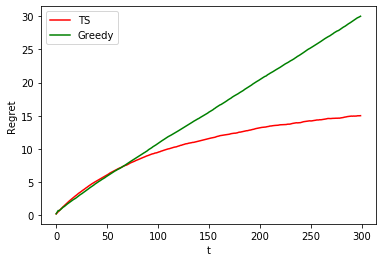

In [4]:
plt.xlabel('t')
plt.ylabel('Regret')
plt.plot(np.cumsum(np.mean(opt - ts_rewards_per_experiment, axis=0)), 'r')
plt.plot(np.cumsum(np.mean(opt - gr_rewards_per_experiment, axis=0)), 'g')
plt.legend(['TS', 'Greedy'])
